In [58]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
import warnings
warnings.filterwarnings('ignore')

In [59]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Password",
  database='database1'
)
print(mydb)

In [60]:
df=pd.read_sql_query("select * from titanic",mydb)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S
4,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,None,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,None,S
886,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
887,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,None,S
888,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Description

Pclass==> Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survival==> Survival (0 = No; 1 = Yes)

name==> Name

sex==> Sex

age==> Age

sibsp==> Number of Siblings/Spouses Aboard

parch==> Number of Parents/Children Aboard

ticket==> Ticket Number

fare Passenger==> Fare (British pound)

cabin==> Cabin

embarked==> Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# Exploratory Data Analysis

# Variable Identification

###### ==> Survived is the target variable

In [61]:
# checking the datatypes of the dataset.
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


###### Observations: Name,Sex,Ticket,Cabin,Embarked and family_type are of object type and remaining all the features are of numeric type

In [62]:
#Checking the columns of dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [63]:
#Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Survived     890 non-null    int64  
 2   Pclass       890 non-null    int64  
 3   Name         890 non-null    object 
 4   Sex          890 non-null    object 
 5   Age          713 non-null    float64
 6   SibSp        890 non-null    int64  
 7   Parch        890 non-null    int64  
 8   Ticket       890 non-null    object 
 9   Fare         890 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     888 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [64]:
#Checking the null values if any
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         2
dtype: int64

###### Observations: There are missing values in the Age,Cabin and Emnarked Columns.

In [65]:
# Checking for count of unique values in each feature
for s in  df.columns:
    print(s,df[s].nunique())

PassengerId 890
Survived 2
Pclass 3
Name 890
Sex 2
Age 71
SibSp 7
Parch 7
Ticket 680
Fare 248
Cabin 147
Embarked 3


# Summary Statistics

In [66]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,890.000000,890.000000,890.000000,713.000000,890.000000,890.000000,890.000000
mean,446.500000,0.384270,2.307865,29.723703,0.522472,0.382022,32.232241
std,257.065167,0.486696,0.836220,14.536595,1.103247,0.806409,49.714300
min,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,224.250000,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,446.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.750000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329000


###### Checking the Correlation

In [67]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.006554,-0.033605,0.035324,-0.056787,-0.002577,0.011703
Survived,-0.006554,1.000000,-0.337996,-0.078399,-0.034955,0.081248,0.256987
Pclass,-0.033605,-0.337996,1.000000,-0.368283,0.082720,0.018893,-0.549322
Age,0.035324,-0.078399,-0.368283,1.000000,-0.308173,-0.189663,0.095339
SibSp,-0.056787,-0.034955,0.082720,-0.308173,1.000000,0.415164,0.159935
Parch,-0.002577,0.081248,0.018893,-0.189663,0.415164,1.000000,0.216015
Fare,0.011703,0.256987,-0.549322,0.095339,0.159935,0.216015,1.000000


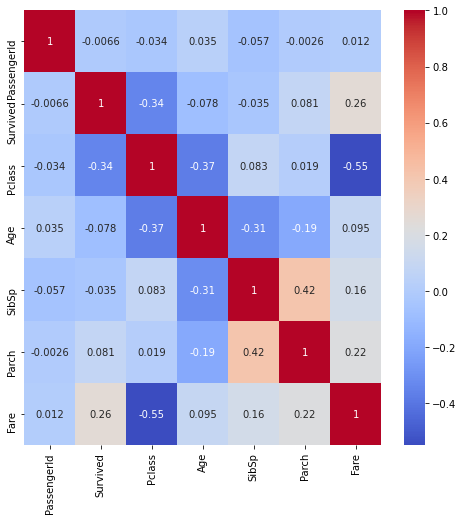

In [68]:
#visualizing correlation using heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm');

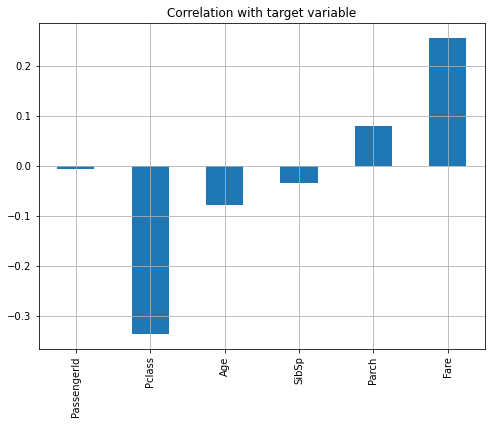

In [69]:
plt.figure(figsize=(8,6))
df.drop('Survived',axis = 1).corrwith(df['Survived']).plot(kind='bar',grid=True)
plt.xticks(rotation = 90)
plt.title('Correlation with target variable');

In [70]:
# Checking for duplicates
df.duplicated().sum()

0

###### Observations: No duplicate values found in the dataset

# Univariate Analysis

<AxesSubplot:xlabel='Fare', ylabel='Count'>

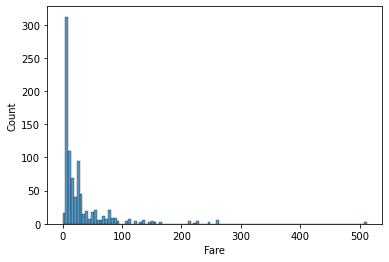

In [71]:
sns.histplot(df['Fare'])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

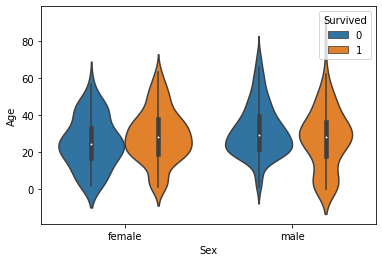

In [72]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = df)

###### Obseravtions: 
###### Survival rate is good for children.
###### As the age increases the survival rate of men decreases
###### Women of age between 20 and 50 survival rate is high.

In [73]:
df['Family_Size'] = df['Parch']+df['SibSp']

In [74]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S,0


In [75]:
df['Family_Size'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

In [76]:
def family_type(n):
    if n==0:
        return 'Alone'
    elif n <=4:
        return 'Medium'
    else:
        return 'Large'

In [77]:
family_type(4)

'Medium'

In [78]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [79]:
df['family_type']=df['Family_Size'].apply(family_type)
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,family_type
666,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.7750,None,S,0,Alone
329,331,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.2500,None,Q,2,Medium
42,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,None,C,3,Medium
99,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,None,S,0,Alone
192,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S,2,Medium


In [80]:
df.shape

(890, 14)

<AxesSubplot:xlabel='Survived', ylabel='count'>

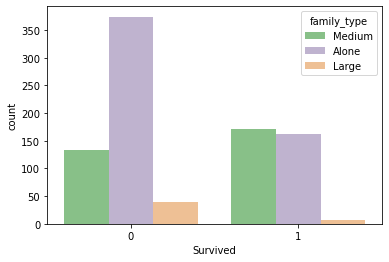

In [81]:
sns.countplot(x='Survived',hue='family_type',data=df,palette='Accent')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

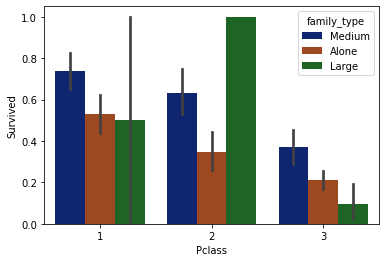

In [82]:
sns.barplot(x='Pclass',y='Survived',hue='family_type',data=df,palette='dark')

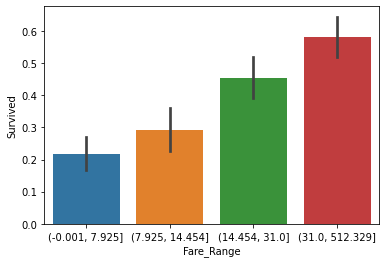

In [83]:
df['Fare_Range'] = pd.qcut(df['Fare'], 4)
sns.barplot(x ='Fare_Range', y ='Survived',data = df);

In [84]:
df.drop(columns=['Fare_Range'],axis=1,inplace=True)

In [85]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,family_type
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Medium
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S,0,Alone
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Medium
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S,0,Alone
4,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,None,Q,0,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,None,S,0,Alone
886,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,Alone
887,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,None,S,3,Medium
888,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,Alone


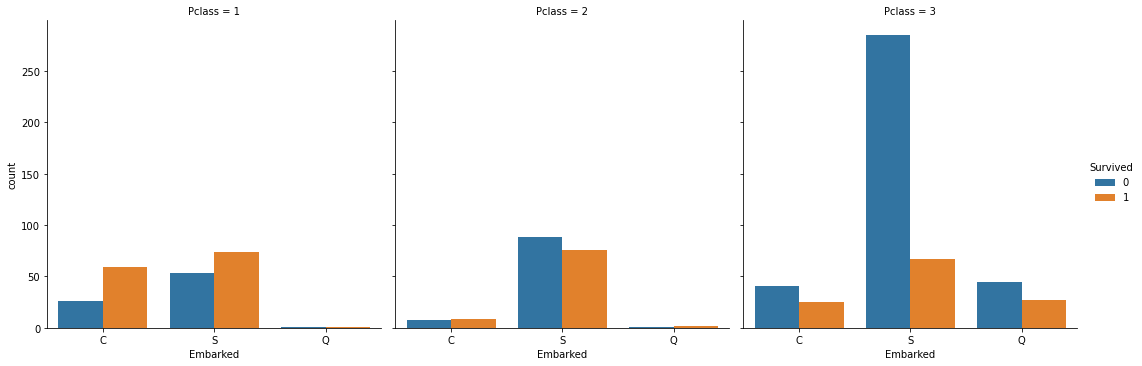

In [86]:
sns.catplot(x ='Embarked', hue ='Survived',kind ='count', col ='Pclass', data = df)

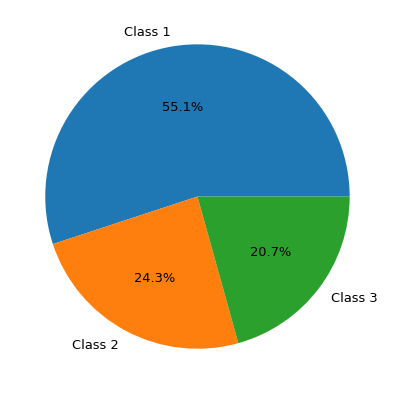

In [87]:
plt.figure(figsize=(7,7))
plt.pie(df['Pclass'].value_counts(), labels=['Class 1', 'Class 2', 'Class 3'],autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

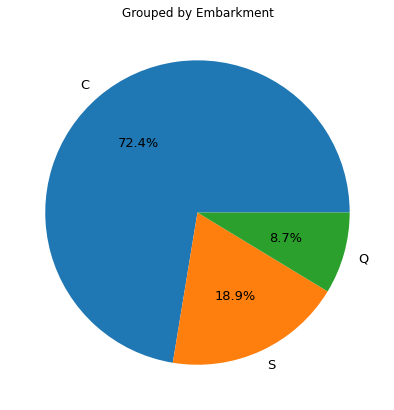

In [88]:
plt.figure(figsize=(7,7))
plt.title('Grouped by Embarkment')
plt.pie(df['Embarked'].value_counts(), labels=['C', 'S', 'Q'],autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

In [89]:
ages = df['Age'].values

In [90]:
ages_hist = np.histogram(ages, bins=[0,10,20,30,40,50,60,70,80,90])
ages_hist 

(array([ 62, 102, 219, 167,  89,  48,  19,   6,   1], dtype=int64),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]))

In [91]:
ages_hist_labels = ['0–10', '11–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81–90']

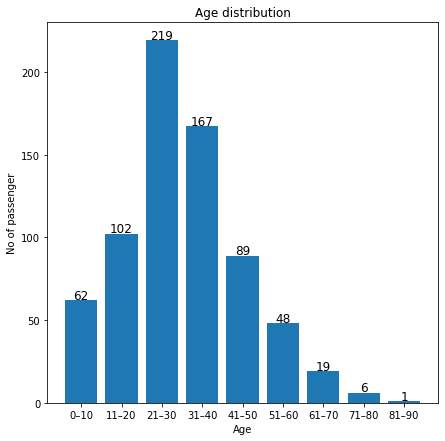

In [92]:
plt.figure(figsize=(7,7))
plt.title('Age distribution')
plt.bar(ages_hist_labels, ages_hist[0])
plt.xlabel('Age')
plt.ylabel('No of passenger')
for i, bin in zip(ages_hist[0], range(9)):
    plt.text(bin, i+3, str(int(i)), fontsize=12,
             horizontalalignment='center', verticalalignment='center')
plt.show()

In [93]:
df.groupby('family_type')['Pclass'].sum()

family_type
Alone     1289
Large      132
Medium     633
Name: Pclass, dtype: int64

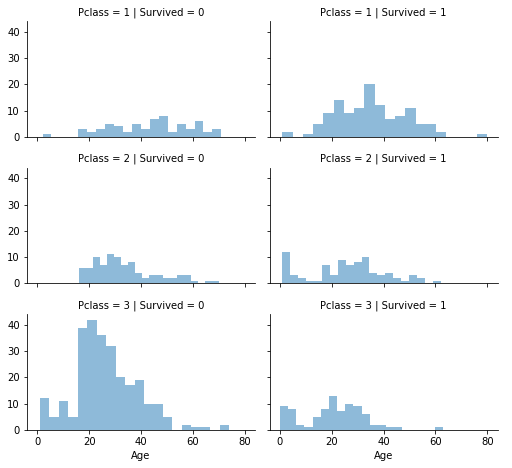

In [94]:
surv_pclass = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
surv_pclass.map(plt.hist, 'Age', alpha=.5, bins=20)
surv_pclass.add_legend();

###### Observations: Passengers of Class 1  are survived more

In [95]:
# Dropping the columns which doesn't add much value
df.drop(['SibSp','Parch','Name','Ticket','Family_Size','Cabin','PassengerId'],axis=1,inplace=True)

In [96]:
df.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,family_type
0,1,1,female,38.0,71.2833,C,Medium
1,1,3,female,26.0,7.9250,S,Alone


In [97]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'family_type'], dtype='object')

In [98]:
# Converting Categorical columns to numeric
df = pd.get_dummies(data=df,columns=['Sex','Embarked','family_type'],drop_first=True)

In [99]:
df.head(3)

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,1,38.0,71.2833,0,0,0,0,1
1,1,3,26.0,7.9250,0,0,1,0,0
2,1,1,35.0,53.1000,0,0,1,0,1


In [100]:
df.shape

(890, 9)

# Missing values treatment

In [101]:
# Checking for missing values in the dataset
df.isna().sum()

Survived                0
Pclass                  0
Age                   177
Fare                    0
Sex_male                0
Embarked_Q              0
Embarked_S              0
family_type_Large       0
family_type_Medium      0
dtype: int64

<AxesSubplot:>

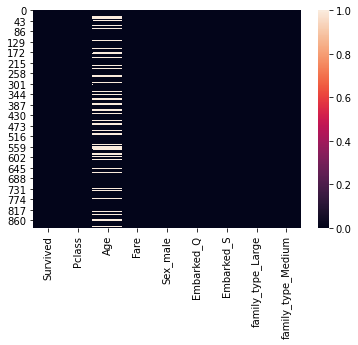

In [102]:
# Visualizing the missing values in the dataset
sns.heatmap(df.isnull(),fmt='.2g')

In [103]:
# Imputing missing values with mean
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [104]:
# Checking for missing values if any
df.isna().sum().any()

False

# Treating Outliers

In [105]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.26583537e+00, 1.56490066e+00, 6.36543953e-01, ...,
        1.61345557e+00, 2.36121287e-01, 1.38148353e+00],
       [1.26583537e+00, 8.28160488e-01, 2.86396237e-01, ...,
        6.19787753e-01, 2.36121287e-01, 7.23859519e-01],
       [1.26583537e+00, 1.56490066e+00, 4.05808906e-01, ...,
        6.19787753e-01, 2.36121287e-01, 1.38148353e+00],
       ...,
       [7.89992146e-01, 8.28160488e-01, 2.73245187e-16, ...,
        6.19787753e-01, 2.36121287e-01, 1.38148353e+00],
       [1.26583537e+00, 1.56490066e+00, 2.86396237e-01, ...,
        1.61345557e+00, 2.36121287e-01, 7.23859519e-01],
       [7.89992146e-01, 8.28160488e-01, 1.75073858e-01, ...,
        1.61345557e+00, 2.36121287e-01, 7.23859519e-01]])

In [106]:
threshold=3
print(np.where(z>3))

(array([  4,  12,  15,  15,  21,  24,  26,  26,  27,  31,  43,  45,  46,
        49,  58,  62,  67,  70,  81,  87,  87,  95, 108, 115, 115, 117,
       118, 125, 142, 155, 158, 163, 166, 170, 170, 179, 181, 185, 187,
       195, 197, 200, 207, 213, 232, 240, 244, 257, 259, 260, 263, 265,
       273, 277, 277, 279, 288, 298, 299, 300, 302, 310, 321, 323, 329,
       340, 340, 357, 358, 359, 363, 367, 376, 379, 385, 387, 410, 411,
       420, 427, 436, 437, 437, 458, 467, 479, 492, 500, 501, 509, 516,
       524, 526, 540, 541, 551, 556, 559, 572, 592, 609, 611, 612, 625,
       628, 629, 633, 637, 641, 652, 653, 656, 671, 677, 678, 679, 682,
       685, 688, 696, 699, 702, 715, 717, 726, 729, 736, 741, 744, 748,
       766, 767, 775, 777, 778, 786, 786, 789, 791, 812, 818, 823, 824,
       827, 845, 849, 850, 862, 884, 884, 889], dtype=int64), array([5, 7, 5, 7, 5, 7, 3, 7, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 5, 3, 7, 2,
       5, 2, 5, 3, 7, 5, 5, 5, 7, 7, 7, 5, 7, 7, 7, 5, 5, 5, 5, 7, 5, 5,

In [107]:
df_new=df[(z<3).all(axis=1)]

In [108]:
print(df.shape,'\t',df_new.shape)

(890, 9) 	 (749, 9)


###### Observations: Now, 890 rows has reduced to 749 rows after removal of outliers

In [109]:
df.skew()

Survived              0.476647
Pclass               -0.628767
Age                   0.432593
Fare                  4.785121
Sex_male             -0.617104
Embarked_Q            2.946593
Embarked_S           -0.995346
family_type_Large     4.005745
family_type_Medium    0.658735
dtype: float64

Survived
0.475843222634752


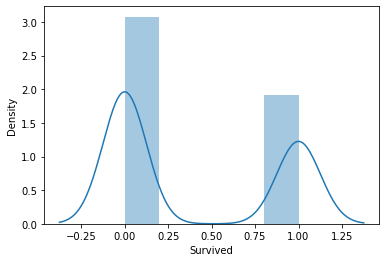

Pclass
-0.6277067190311635


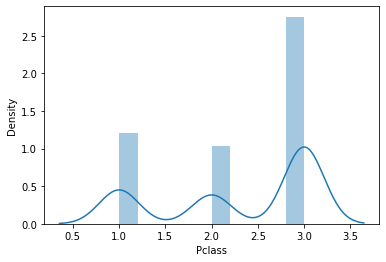

Age
0.4318633003092477


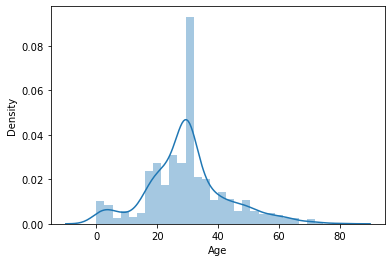

Fare
4.777052810630393


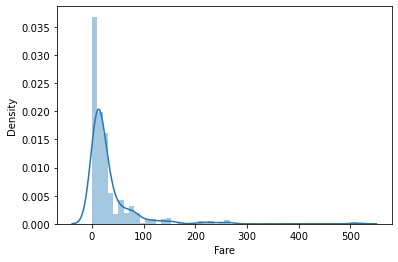

Sex_male
-0.6160631407148845


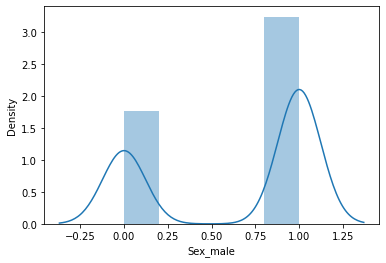

Embarked_Q
2.941624127170403


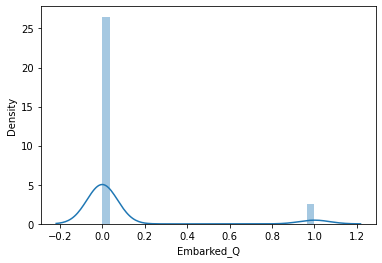

Embarked_S
-0.9936678141474922


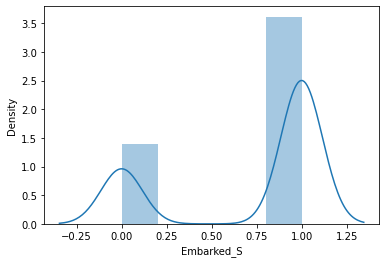

family_type_Large
3.9989903069306023


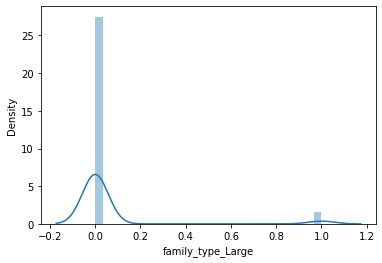

family_type_Medium
0.6576240071392394


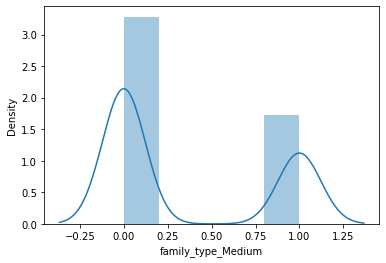

In [110]:
#Let's visualize the skewness with the distplots.
from scipy.stats import skew

for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

###### Observations: Only Fare column is right skewed. So,we treat Fare column using log to treat skewness.

In [111]:
df['Fare']=np.log1p(df['Fare'])

# Feature Scaling

In [112]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [113]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range =(0, 1))  
x = min_max_scaler.fit_transform(x) 
x

array([[0.        , 0.475     , 0.6858917 , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.325     , 0.35072672, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.4375    , 0.63946279, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.37154628, 0.51220521, ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.325     , 0.55023761, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.4       , 0.34755369, ..., 0.        , 0.        ,
        0.        ]])

In [115]:
df.to_csv("Titanic_EDA.csv")

In [117]:
# EDA(Exploratory data analysis) project ends here